In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr
sys.setdefaultencoding("utf-8")

In [3]:
from utils import data

In [4]:
cohort = data.init_cohort(join_with=["tcr_peripheral_a", "tcr_tumor"], 
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows


inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{'dataframe_hash': 680204259460919008,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [5]:
df = cohort.as_dataframe()

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows


In [6]:
high_tumor_and_low_blood_clonality_description = (
    "\n%s > median," 
    "\n%s ≤ median") % (
    cohort.tcr_tumor_clonality_plot_name,
    cohort.tcr_peripheral_a_clonality_plot_name)

In [7]:
def high_tumor_and_low_blood_clonality(row):
    either = ((row["Clonality_tcr_peripheral_a"] <= df["Clonality_tcr_peripheral_a"].median()) and 
              (row["Clonality_tcr_tumor"] > df["Clonality_tcr_tumor"].median()))
    return either

In [8]:
def high_tumor_or_low_blood_clonality(row):
    either = ((row["Clonality_tcr_peripheral_a"] <= df["Clonality_tcr_peripheral_a"].median()) or 
              (row["Clonality_tcr_tumor"] > df["Clonality_tcr_tumor"].median()))
    return either

In [9]:
def low_tumor_and_high_blood_clonality(row):
    either = ((row["Clonality_tcr_peripheral_a"] > df["Clonality_tcr_peripheral_a"].median()) and 
              (row["Clonality_tcr_tumor"] <= df["Clonality_tcr_tumor"].median()))
    return either

In [10]:
from utils.paper import *

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows

TIL Clonality > median,
Pre-treatment Peripheral TCR Clonality ≤ median False  \
Response                                                                          
DCB                                                                           3   
No DCB                                                                       15   


TIL Clonality > median,
Pre-treatment Peripheral TCR Clonality ≤ median True   
Response                                                                         
DCB                                                                           5  
No DCB                                                                        1  
Fisher's Exact Test: OR: 0.04, p-value=0.00686498855835 (two-sided)
{{{til_high_blood_low_pfs_plot}}}
{{{til_high_blood_low_pfs_benefit:63%}}}
{{{til_high_blood_low_pfs_no_benefit:6%}}}
{{{til_high_blood_low_pfs_fishers:n=24, Fisher's Exact p=0.0069}}}

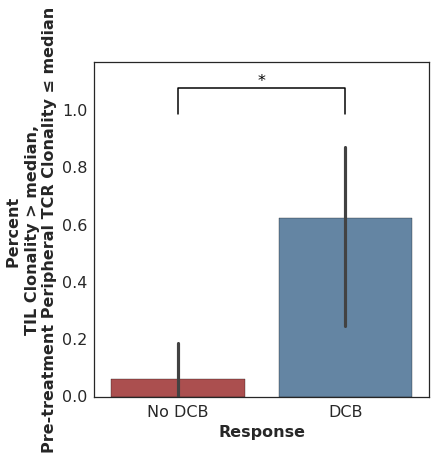

In [11]:
fishers_exact_hyper_label_printer(
    cohort.plot_benefit(on={high_tumor_and_low_blood_clonality_description: high_tumor_and_low_blood_clonality}),
    label="til_high_blood_low_pfs")

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows

TIL Clonality > median,
Pre-treatment Peripheral TCR Clonality ≤ median False  \
Response                                                                          
DCB-OS                                                                        6   
No DCB-OS                                                                    12   


TIL Clonality > median,
Pre-treatment Peripheral TCR Clonality ≤ median True   
Response                                                                         
DCB-OS                                                                        6  
No DCB-OS                                                                     0  
Fisher's Exact Test: OR: 0.0, p-value=0.0137299771167 (two-sided)
{{{til_high_blood_low_os_plot}}}
{{{til_high_blood_low_os_benefit:50%}}}
{{{til_high_blood_low_os_no_benefit:0%}}}
{{{til_high_blood_low_os_fishers:n=24, Fisher's Exact p=0.014}}}


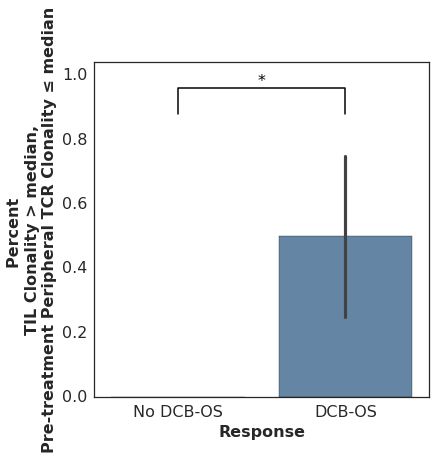

In [12]:
fishers_exact_hyper_label_printer(
    cohort.plot_benefit_os(on={high_tumor_and_low_blood_clonality_description: high_tumor_and_low_blood_clonality}),
    label="til_high_blood_low_os")
    

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
high_tumor_or_low_blood_clonality  False  True 
Response                                       
DCB                                    2      6
No DCB                                 4     12
Fisher's Exact Test: OR: 1.0, p-value=1.0 (two-sided)


FishersExactResults(oddsratio=1.0, p_value=1.0, sided_str='two-sided')

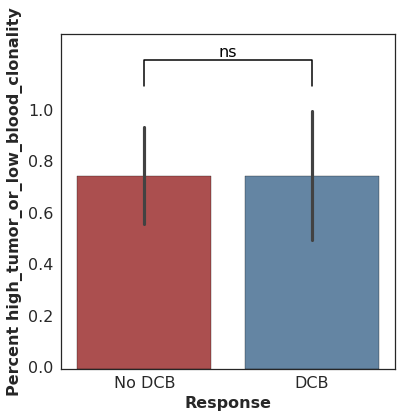

In [13]:
cohort.plot_benefit(high_tumor_or_low_blood_clonality)

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
high_tumor_or_low_blood_clonality  False  True 
Response                                       
DCB                                    2     10
No DCB                                 4      8
Fisher's Exact Test: OR: 0.4, p-value=0.640405361229 (two-sided)


FishersExactResults(oddsratio=0.4, p_value=0.640405361229, sided_str='two-sided')

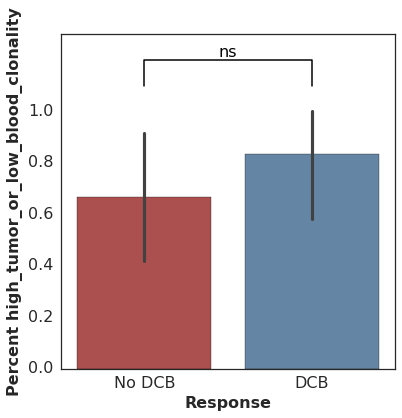

In [14]:
cohort.plot_benefit(high_tumor_or_low_blood_clonality, benefit_col="is_benefit_os")

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
low_tumor_and_high_blood_clonality  False  True 
Response                                        
DCB                                     6      2
No DCB                                 12      4
Fisher's Exact Test: OR: 1.0, p-value=1.0 (two-sided)


FishersExactResults(oddsratio=1.0, p_value=1.0, sided_str='two-sided')

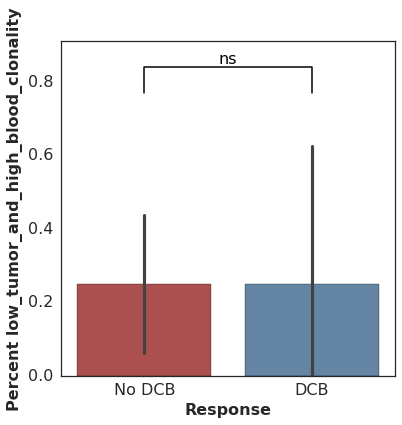

In [15]:
cohort.plot_benefit(low_tumor_and_high_blood_clonality)

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
low_tumor_and_high_blood_clonality  False  True 
Response                                        
DCB                                    10      2
No DCB                                  8      4
Fisher's Exact Test: OR: 2.5, p-value=0.640405361229 (two-sided)


FishersExactResults(oddsratio=2.5, p_value=0.640405361229, sided_str='two-sided')

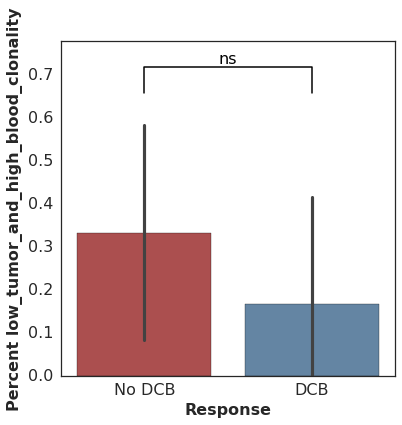

In [16]:
cohort.plot_benefit(low_tumor_and_high_blood_clonality, benefit_col="is_benefit_os")

In [17]:
# Adapted from statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.html compare_lr
def compare_lr(model, other_model):
    from scipy import stats
    ll_model = model.llf
    ll_other_model = other_model.llf
    df_model = model.df_resid
    df_other_model = other_model.df_resid

    lrdf = (df_other_model - df_model)
    lrstat = -2*(ll_other_model - ll_model)
    lr_pvalue = stats.chi2.sf(lrstat, lrdf)
    return lrstat, lr_pvalue, lrdf

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

In [19]:
df.rename(columns={"Clonality_tcr_peripheral_a": "blood_clonality",
                   "Clonality_tcr_tumor": "tumor_clonality",
                   "T-cell fraction_tcr_tumor": "til_fraction"}, inplace=True)

In [20]:
def add_rescaled_cols(d, col):
    import numpy as np
    log_col = "log_%s" % col
    log_col_centered = "log_%s_centered" % col
    log_col_rescaled = "log_%s_rescaled" % col
    d[log_col] = np.log1p(d[col])
    d[log_col_centered] = d[log_col] - np.mean(d[log_col])
    d[log_col_rescaled] = d[log_col_centered] / np.std(d[log_col_centered])

In [21]:
add_rescaled_cols(df, "blood_clonality")
add_rescaled_cols(df, "tumor_clonality")
add_rescaled_cols(df, "til_fraction")

In [22]:
from utils.paper import *

In [23]:
def run_with_benefit_col(benefit_col, how):
    df["benefit"] = df[benefit_col].apply(lambda b: 1 if b else 0)
    
    null_model = logit("benefit ~ 1", df).fit()
    model_blood = logit("benefit ~ log_blood_clonality_rescaled", df).fit()
    model_tumor = logit("benefit ~ log_tumor_clonality_rescaled", df).fit()
    model_blood_tumor = logit("benefit ~ log_blood_clonality_rescaled * log_tumor_clonality_rescaled", df).fit()
    model_blood_tumor_and_fraction = logit("benefit ~ log_blood_clonality_rescaled * log_tumor_clonality_rescaled * log_til_fraction_rescaled", df).fit()
    
    def llr_formatter(results):
        return "n=%d, log-likelihood p=%s" % (len(cohort.as_dataframe()), float_str(results[1]))
    
    hyper_label_printer(llr_formatter, label="llr_tumor_vs_null_%s" % how, results=(
        compare_lr(model_tumor, null_model)))
    hyper_label_printer(llr_formatter, label="llr_blood_vs_null_%s" % how, results=(
        compare_lr(model_blood, null_model)))
    hyper_label_printer(llr_formatter, label="llr_blood_tumor_vs_null_%s" % how, results=(
        compare_lr(model_blood_tumor, null_model)))
    hyper_label_printer(llr_formatter, label="llr_blood_tumor_vs_tumor_%s" % how, results=(
        compare_lr(model_blood_tumor, model_tumor)))
    hyper_label_printer(llr_formatter, label="llr_blood_tumor_vs_blood_%s" % how, results=(
        compare_lr(model_blood_tumor, model_blood)))
    
    hyper_label_printer(llr_formatter, label="llr_blood_tumor_clonality_and_til_fraction_vs_null_%s" % how, results=(
        compare_lr(model_blood_tumor_and_fraction, null_model)))

In [24]:
run_with_benefit_col("is_benefit", "pfs")

Optimization terminated successfully.
         Current function value: 0.636514
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.606352
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582929
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.266716
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.176987
         Iterations 10
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows


{{{llr_tumor_vs_null_pfs:n=24, log-likelihood p=0.11}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_vs_null_pfs:n=24, log-likelihood p=0.23}}}


inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_vs_null_pfs:n=24, log-likelihood p=0.00050}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_vs_tumor_pfs:n=24, log-likelihood p=0.00051}}}


inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_vs_blood_pfs:n=24, log-likelihood p=0.00029}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_clonality_and_til_fraction_vs_null_pfs:n=24, log-likelihood p=0.0025}}}


In [25]:
run_with_benefit_col("is_benefit_os", "os")

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.531276
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.684448
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.440796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.268061
         Iterations 10
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_tumor_vs_null_os:n=24, log-likelihood p=0.52}}}


inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_vs_null_os:n=24, log-likelihood p=0.0053}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows


{{{llr_blood_tumor_vs_null_os:n=24, log-likelihood p=0.0070}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_vs_tumor_os:n=24, log-likelihood p=0.0029}}}


inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows
{{{llr_blood_tumor_vs_blood_os:n=24, log-likelihood p=0.11}}}
inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_peripheral_a: 24 to 24 rows


{{{llr_blood_tumor_clonality_and_til_fraction_vs_null_os:n=24, log-likelihood p=0.0048}}}
